# importing packages

In [62]:

import pandas as pd
import numpy as np
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# importing the CSV

In [63]:
e_df = pd.read_csv('ev_data.csv')
z_df = pd.read_csv('uszipcode_data.csv')

/Users/akhila/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [64]:
e_df.shape


(99878, 14)

In [66]:
temp_df = pd.DataFrame({'reg_count' : e_df.groupby(['ZIP Code']).size()}).reset_index()


In [67]:
temp_df['ZIP Code'] = pd.to_numeric(temp_df['ZIP Code'],errors= 'coerce')


In [68]:
df = pd.merge(temp_df,z_df, left_on = 'ZIP Code',right_on= 'zipcode')
# df['population_by_year']

/Users/akhila/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


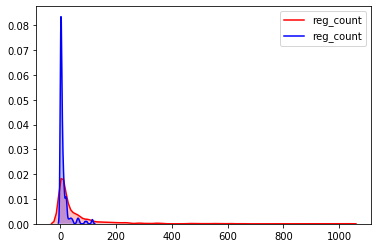

In [69]:
sns.kdeplot(df[df['state']=='WA']['reg_count'], shade=True, color="r")
sns.kdeplot(df[df['state']=='VT']['reg_count'], shade=True, color="b")
plt.show()

In [70]:
df.loc[23,'population_by_year'] ### sample data--- convert to dict and then get the last one


"[{'key': 'Data', 'values': [{'x': 2007, 'y': 2730}, {'x': 2008, 'y': 2628}, {'x': 2009, 'y': 2510}, {'x': 2010, 'y': 2538}, {'x': 2011, 'y': 2536}, {'x': 2012, 'y': 2540}, {'x': 2013, 'y': 2570}, {'x': 2014, 'y': 2600}, {'x': 2015, 'y': 2560}]}]"

In [71]:
def get_population(x):
    try:
        dict_x = eval(x)
        return dict_x[0]['values'][-1]['y']
    except:
        return None

In [72]:
df['population_2015'] = df['population_by_year'].apply(get_population)


In [73]:
df['ev_per_1000'] = (df['reg_count']/df['population_2015'])*1000


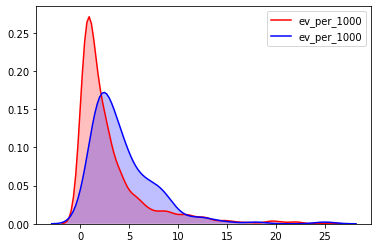

In [74]:
sns.kdeplot(df[(df['state']=='WA')&(df['ev_per_1000'].isnull()!=True)]['ev_per_1000'], shade=True, color="r")
sns.kdeplot(df[(df['state']=='VT')&(df['ev_per_1000'].isnull()!=True)]['ev_per_1000'], shade=True, color="b")

In [75]:
df.loc[765,'median_household_income']
# df['state'].uni

59414.0

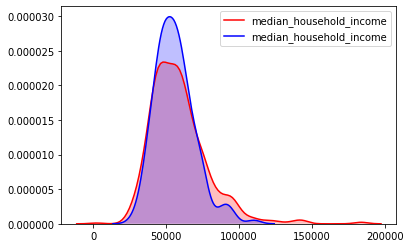

In [76]:
sns.kdeplot(df[(df['state']=='WA')&(df['median_household_income'].isnull()!=True)]['median_household_income'], shade=True, color="r")
sns.kdeplot(df[(df['state']=='VT')&(df['median_household_income'].isnull()!=True)]['median_household_income'], shade=True, color="b")

In [77]:
df.loc[765,'median_home_value']


449500.0

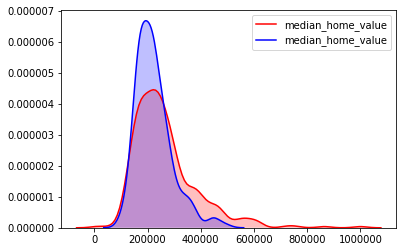

In [78]:
sns.kdeplot(df[(df['state']=='WA')&(df['median_home_value'].isnull()!=True)]['median_home_value'], shade=True, color="r")
sns.kdeplot(df[(df['state']=='VT')&(df['median_home_value'].isnull()!=True)]['median_home_value'], shade=True, color="b")

In [79]:
df.loc[765,'educational_attainment_for_population_25_and_over']


'[{\'key\': \'Data\', \'values\': [{\'x\': \'Less Than High School Diploma\', \'y\': 361}, {\'x\': \'High School Graduate\', \'y\': 2870}, {\'x\': "Associate\'s Degree", \'y\': 439}, {\'x\': "Bachelor\'s Degree", \'y\': 1376}, {\'x\': "Master\'s Degree", \'y\': 837}, {\'x\': \'Professional School Degree\', \'y\': 130}, {\'x\': \'Doctorate Degree\', \'y\': 217}]}]'

In [80]:
cols_list= list(df.columns)

In [81]:
df.iloc[0:5,0:5]

ZIP Code  reg_count  Unnamed: 0 zipcode_type            major_city
0    5001.0         12           0     Standard  White River Junction
1    5032.0          4           1     Standard                Bethel
2    5033.0          8           2     Standard              Bradford
3    5034.0          1           3     Standard           Bridgewater
4    5035.0          2           4     Standard   Bridgewater Corners

In [82]:
df.drop(columns=['Unnamed: 0','zipcode_type'], inplace=True)

In [83]:
import ast

In [84]:
df['common_city_list'] = df['common_city_list'].apply(lambda x: ast.literal_eval(x) if pd.isnull(x)==False else x)

In [85]:
city_list=[]
for i in df['common_city_list']:
    for j in i:
        city_list.append(j)

In [86]:
df.describe()

ZIP Code    reg_count          lat          lng  radius_in_miles  \
count   2946.000000  2946.000000  2937.000000  2937.000000      2937.000000   
mean   65501.792600    32.816022    44.119102  -100.439439         9.028508   
std    32068.464333    74.725354     3.076754    18.731274         7.578707   
min     5001.000000     1.000000    25.600000  -124.500000         0.454545   
25%    48656.250000     2.000000    42.300000  -122.110000         4.000000   
50%    56492.500000     7.000000    44.500000   -95.600000         7.000000   
75%    98037.000000    29.000000    46.600000   -84.080000        12.000000   
max    99403.000000  1282.000000    48.990000   -71.490000        58.000000   

         population  population_density  land_area_in_sqmi  \
count   2937.000000         2935.000000        2937.000000   
mean   14319.553286         1456.412947          84.410252   
std    13658.499420         4404.134366         143.040862   
min        0.000000            0.000000           0.000000   
25%     3100.000000           45.500000          10.850000   
50%     9259.000000          196.000000          36.030000   
75%    22701.000000         1775.000000          93.090000   
max    94600.000000       125860.000000        2378.680000   

       water_area_in_sqmi  housing_units  occupied_housing_units  \
count         2937.000000    2937.000000             2937.000000   
mean             2.832775    6240.825332             5623.798093   
std              8.200198    5711.327301             5348.519472   
min              0.000000       0.000000                0.000000   
25%              0.110000    1546.000000             1210.000000   
50%              0.620000    4171.000000             3618.000000   
75%              2.300000    9992.000000             9164.000000   
max            170.810000   47617.000000            44432.000000   

       median_home_value  median_household_income       zipcode  \
count       2.923000e+03              2933.000000   2946.000000   
mean        2.283612e+05             59361.396522  65501.792600   
std         1.235411e+05             21890.196191  32068.464333   
min         1.020000e+04              2499.000000   5001.000000   
25%         1.517000e+05             44913.000000  48656.250000   
50%         2.041000e+05             55083.000000  56492.500000   
75%         2.729000e+05             68704.000000  98037.000000   
max         1.000001e+06            250001.000000  99403.000000   

       population_2015  ev_per_1000  
count      2935.000000  2935.000000  
mean      13522.890290     2.500016  
std       13180.114993     3.668659  
min          66.000000     0.012663  
25%        2780.000000     0.569174  
50%        8630.000000     1.283186  
75%       21755.000000     2.941176  
max       79240.000000    72.057811

In [87]:
df.corr()

ZIP Code  reg_count       lat       lng  \
ZIP Code                 1.000000   0.222388  0.424690 -0.969499   
reg_count                0.222388   1.000000  0.166032 -0.255433   
lat                      0.424690   0.166032  1.000000 -0.493987   
lng                     -0.969499  -0.255433 -0.493987  1.000000   
radius_in_miles          0.275616  -0.164308  0.166519 -0.266241   
population               0.102791   0.419436 -0.097832 -0.077095   
population_density      -0.007910   0.140812 -0.034139 -0.001144   
land_area_in_sqmi        0.215435  -0.133301  0.046013 -0.194462   
water_area_in_sqmi       0.054519  -0.053988  0.171302 -0.046253   
housing_units            0.097896   0.427090 -0.101840 -0.069270   
occupied_housing_units   0.102346   0.439714 -0.096706 -0.077118   
median_home_value        0.039382   0.354727  0.014528 -0.141043   
median_household_income -0.190122   0.253407 -0.117645  0.145559   
zipcode                  1.000000   0.222388  0.424690 -0.969499   
population_2015          0.127371   0.442808 -0.091110 -0.103285   
ev_per_1000              0.162299   0.627626  0.201722 -0.229001   

                         radius_in_miles  population  population_density  \
ZIP Code                        0.275616    0.102791           -0.007910   
reg_count                      -0.164308    0.419436            0.140812   
lat                             0.166519   -0.097832           -0.034139   
lng                            -0.266241   -0.077095           -0.001144   
radius_in_miles                 1.000000   -0.229427           -0.264376   
population                     -0.229427    1.000000            0.322982   
population_density             -0.264376    0.322982            1.000000   
land_area_in_sqmi               0.803158   -0.161653           -0.172555   
water_area_in_sqmi              0.333956   -0.064210           -0.089212   
housing_units                  -0.223011    0.977990            0.392941   
occupied_housing_units         -0.243872    0.986087            0.388631   
median_home_value              -0.174692    0.080393            0.235559   
median_household_income        -0.243878    0.098549            0.031546   
zipcode                         0.275616    0.102791           -0.007910   
population_2015                -0.236244    0.981094            0.290205   
ev_per_1000                    -0.128823   -0.033914            0.070621   

                         land_area_in_sqmi  water_area_in_sqmi  housing_units  \
ZIP Code                          0.215435            0.054519       0.097896   
reg_count                        -0.133301           -0.053988       0.427090   
lat                               0.046013            0.171302      -0.101840   
lng                              -0.194462           -0.046253      -0.069270   
radius_in_miles                   0.803158            0.333956      -0.223011   
population                       -0.161653           -0.064210       0.977990   
population_density               -0.172555           -0.089212       0.392941   
land_area_in_sqmi                 1.000000            0.324885      -0.149681   
water_area_in_sqmi                0.324885            1.000000      -0.027489   
housing_units                    -0.149681           -0.027489       1.000000   
occupied_housing_units           -0.169266           -0.059987       0.994743   
median_home_value                -0.147484           -0.055571       0.097334   
median_household_income          -0.219656           -0.110331       0.051461   
zipcode                           0.215435            0.054519       0.097896   
population_2015                  -0.174512           -0.073142       0.946293   
ev_per_1000                      -0.125967           -0.050122      -0.014529   

                         occupied_housing_units  median_home_value  \
ZIP Code                               0.102346           0.039382   
reg_count                              0.439714          

# explorations

In [263]:
df['population'].head()

0    9123.0
1    2664.0
2    2744.0
3     310.0
4     638.0
Name: population, dtype: float64

In [91]:
df.loc[0,'population_by_year']

"[{'key': 'Data', 'values': [{'x': 2007, 'y': 6837}, {'x': 2008, 'y': 6414}, {'x': 2009, 'y': 6434}, {'x': 2010, 'y': 6525}, {'x': 2011, 'y': 6521}, {'x': 2012, 'y': 6560}, {'x': 2013, 'y': 6560}, {'x': 2014, 'y': 6560}, {'x': 2015, 'y': 6660}]}]"

In [92]:
df.loc[0,'children_by_age']

"[{'key': 'Male', 'values': [{'x': 0, 'y': 54}, {'x': 1, 'y': 54}, {'x': 2, 'y': 57}, {'x': 3, 'y': 56}, {'x': 4, 'y': 57}, {'x': 5, 'y': 61}, {'x': 6, 'y': 60}, {'x': 7, 'y': 60}, {'x': 8, 'y': 53}, {'x': 9, 'y': 52}, {'x': 10, 'y': 58}, {'x': 11, 'y': 63}, {'x': 12, 'y': 38}, {'x': 13, 'y': 69}, {'x': 14, 'y': 49}, {'x': 15, 'y': 59}, {'x': 16, 'y': 64}, {'x': 17, 'y': 48}, {'x': 18, 'y': 39}, {'x': 19, 'y': 45}]}, {'key': 'Female', 'values': [{'x': 0, 'y': 44}, {'x': 1, 'y': 50}, {'x': 2, 'y': 54}, {'x': 3, 'y': 36}, {'x': 4, 'y': 45}, {'x': 5, 'y': 43}, {'x': 6, 'y': 43}, {'x': 7, 'y': 28}, {'x': 8, 'y': 53}, {'x': 9, 'y': 55}, {'x': 10, 'y': 46}, {'x': 11, 'y': 50}, {'x': 12, 'y': 49}, {'x': 13, 'y': 51}, {'x': 14, 'y': 56}, {'x': 15, 'y': 73}, {'x': 16, 'y': 58}, {'x': 17, 'y': 43}, {'x': 18, 'y': 30}, {'x': 19, 'y': 32}]}, {'key': 'Total', 'values': [{'x': 0, 'y': 98}, {'x': 1, 'y': 104}, {'x': 2, 'y': 111}, {'x': 3, 'y': 92}, {'x': 4, 'y': 102}, {'x': 5, 'y': 104}, {'x': 6, 'y'

In [93]:
df.loc[0,'families_vs_singles']

"[{'key': 'Data', 'values': [{'x': 'Husband Wife Family Households', 'y': 1788}, {'x': 'Single Guardian', 'y': 599}, {'x': 'Singles', 'y': 1376}, {'x': 'Singles With Roommate', 'y': 344}]}]"

In [265]:
def get_family(x):
    try:
        dict_x = eval(x)
        return dict_x[0]['values'][0]['y']
    except
        return None
df['Husband Wife Family Households'] = df['families_vs_singles'].apply(get_family)


In [ ]:
df['Husband Wife Family Households'].head()

In [98]:
def get_family1(x):
    try:
        dict_x = eval(x)
        return dict_x[0]['values'][1]['y']
    except:
        return None
df['Single Guardian'] = df['families_vs_singles'].apply(get_family1)

In [266]:
df['Single Guardian'].head()

0    599.0
1    181.0
2    195.0
3     20.0
4     26.0
Name: Single Guardian, dtype: float64

In [101]:
df.loc[0,'households_with_kids']

"[{'key': 'Data', 'values': [{'x': 'Households Without Kids', 'y': 3022}, {'x': 'Households With Kids', 'y': 1085}]}]"

In [ ]:
def get_states(x):
    try:
        dict_x = eval(x)
        return dict_x[0]['values'][1]['y']
    except:
        return None

In [103]:
def get_household_with_kids(x):
    try:
        dict_x = eval(x)
        return dict_x[0]['values'][0]['y']
    except:
        return None
df['Households Without Kids'] = df['households_with_kids'].apply(get_household_with_kids)

In [105]:
df['Households With Kids']=df['households_with_kids'].apply(get_states)

In [106]:
df['Households With Kids'].head()

0    1085.0
1     310.0
2     350.0
3      37.0
4      60.0
Name: Households With Kids, dtype: float64

In [ ]:
df.loc[0,'vacancy']

In [ ]:
df.loc[0,'owner_occupied_home_values']

In [118]:
def get_home_values(x):
    try:
        dict_x = eval(x)
        return dict_x[0]['values'][-1]['y']
    except:
        return None

In [ ]:
df['owner_occupied_home_values_4']=df['owner_occupied_home_values'].apply(get_home_values)

In [ ]:
df['owner_occupied_home_values_4'].head()

In [ ]:
eval(df['owner_occupied_home_values'])

In [267]:

df.loc[0,'rental_properties_by_number_of_rooms']

"[{'key': 'Data', 'values': [{'x': 'Studio Apartment', 'y': 153}, {'x': '1 Bedroom', 'y': 398}, {'x': '2 Bedroom', 'y': 747}, {'x': '3+ Bedroom', 'y': 330}]}]"

In [ ]:
def get_rental_property(x):
    try:
        dict_x = eval(x)
        return dict_x[0]['values'][-1]['y']
    except:
        return None
df['rental_properties_by_number_of_rooms_3+']=df['rental_properties_by_number_of_rooms'].apply(get_rental_property)

In [ ]:
df['rental_properties_by_number_of_rooms_3+']

In [ ]:
def get_home_values1(x):
    try:
        dict_x = eval(x)
        return dict_x[0]['values'][-2]['y']
    except:
        return None
df['rental_properties_by_number_of_rooms_2']=df['rental_properties_by_number_of_rooms'].apply(get_home_values1)

In [272]:
df.loc[0,'monthly_rent_including_utilities_3plus_b']

276.0

In [109]:
def get_home_values1(x):
    try:
        dict_x = eval(x)
        return dict_x[0]['values'][-2]['y']
    except:
        return None
df['monthly_rent_including_utilities_3plus_b']=df['monthly_rent_including_utilities_3plus_b'].apply(get_home_values)

In [110]:
df['monthly_rent_including_utilities_3plus_b'].head()

0    276.0
1     29.0
2     36.0
3      0.0
4     26.0
Name: monthly_rent_including_utilities_3plus_b, dtype: float64

In [111]:
df.loc[0,'employment_status']

"[{'key': 'Data', 'values': [{'x': 'Worked Full-time With Earnings', 'y': 3408}, {'x': 'Worked Part-time With Earnings', 'y': 2266}, {'x': 'No Earnings', 'y': 2114}]}]"

In [268]:
def get_employment_status(x):
    try:
        dict_x = eval(x)
        return dict_x[0]['values'][1]['y']
    except:
        return None
df['employment_status']=df['employment_status'].apply(get_employment_status)

In [115]:
df['employment_status']

0       3408.0
1       1108.0
2        815.0
3        100.0
4        165.0
5        413.0
6        216.0
7        523.0
8        366.0
9        111.0
10       202.0
11       820.0
12      1020.0
13       514.0
14       121.0
15      1180.0
16       105.0
17        87.0
18      1606.0
19       494.0
20       424.0
21        49.0
22       891.0
23       891.0
24       164.0
25       186.0
26         NaN
27       393.0
28       437.0
29       172.0
         ...  
2916     279.0
2917    1301.0
2918     572.0
2919    4021.0
2920    1105.0
2921    1080.0
2922     524.0
2923     151.0
2924    2951.0
2925     127.0
2926    1360.0
2927     315.0
2928     490.0
2929    2465.0
2930     232.0
2931     392.0
2932     227.0
2933     198.0
2934    1176.0
2935     240.0
2936     288.0
2937     111.0
2938     990.0
2939     137.0
2940    1069.0
2941     735.0
2942     266.0
2943     958.0
2944     771.0
2945      62.0
Name: employment_status, Length: 2946, dtype: float64

In [269]:
df.loc[0,'average_household_income_over_time']

"[{'key': 'Data', 'values': [{'x': 2007, 'y': 42829.3497}, {'x': 2008, 'y': 46236.3921}, {'x': 2009, 'y': 47155.5495}, {'x': 2010, 'y': 47010.1877}, {'x': 2011, 'y': 47169.1779}, {'x': 2012, 'y': 49068.9474}, {'x': 2013, 'y': 48843.3333}, {'x': 2014, 'y': 52880.4124}, {'x': 2015, 'y': 54739.9491}]}]"

In [273]:
def average_household_income(x):
    try:
        dict_x = eval(x)
        return dict_x[0]['values'][-1]['y']
    except:
        return None
df['average_household_income_2015']=df['average_household_income_over_time'].apply(average_household_income)

In [ ]:
df['average_household_income_2015']

In [113]:
df.loc[0,'household_income']

"[{'key': 'Data', 'values': [{'x': '< $25,000', 'y': 911}, {'x': '$25,000-$44,999', 'y': 763}, {'x': '$45,000-$59,999', 'y': 649}, {'x': '$60,000-$99,999', 'y': 1048}, {'x': '$100,000-$149,999', 'y': 663}, {'x': '$150,000-$199,999', 'y': 152}, {'x': '$200,000+', 'y': 104}]}]"

In [275]:
def average_household_income(x):
    try:
        dict_x = eval(x)
        return dict_x[0]['values'][-1]['y']
    except:
        return None
df['household_income_']=df['average_household_income_over_time'].apply(average_household_income)

In [ ]:
df.loc[0,'household_investment_income____average_income_per_household_by_income_source']

In [274]:
df.loc[0,'annual_individual_earnings']

259.0

In [ ]:

df['annual_individual_earnings']=df['annual_individual_earnings'].apply(get_home_values)

In [ ]:
df.dtypes

In [ ]:
df.corr()

In [ ]:
df.loc[0,'source_of_earnings']

In [ ]:
df.loc[0,'means_of_transportation_to_work_for_workers_16_and_over']

In [ ]:
df

In [ ]:
df.loc[0,'families_vs_singles']

In [ ]:
df.loc[0,'monthly_rent_including_utilities_studio_apt']

In [ ]:
df.loc[0,'households_with_kids']

In [ ]:
df.loc[0,'annual_individual_earnings']

In [ ]:
df.loc[0,'household_investment_income____percent_of_households_receiving_investment_income']

In [ ]:
df.loc[0,'population_by_age']

In [ ]:
df.loc[0,'households_with_kids']

In [ ]:
df.columns

In [ ]:
df['households_with_kids']

In [117]:
df.loc[0,'annual_individual_earnings']

"[{'key': 'Data', 'values': [{'x': '< $10,000', 'y': 758}, {'x': '$10,000-$19,999', 'y': 903}, {'x': '$20,000-$29,999', 'y': 794}, {'x': '$30,000-$39,999', 'y': 763}, {'x': '$40,000-$49,999', 'y': 655}, {'x': '$50,000-$64,999', 'y': 978}, {'x': '$65,000-$74,999', 'y': 295}, {'x': '$75,000-$99,999', 'y': 269}, {'x': '$100,000+', 'y': 259}]}]"

In [119]:
df['annual_individual_earnings']=df['annual_individual_earnings'].apply(get_home_values)

In [120]:
df.head(1)

ZIP Code  reg_count            major_city          post_office_city  \
0    5001.0         12  White River Junction  White River Junction, VT   

                        common_city_list          county state    lat    lng  \
0  [White River Junction, White Riv Jct]  Windsor County    VT  43.66 -72.38   

  timezone  ...  means_of_transportation_to_work_for_workers_16_and_over  \
0  Eastern  ...  [{'key': 'Data', 'values': [{'x': 'Car, Truck,...         

                      travel_time_to_work_in_minutes  \
0  [{'key': 'Data', 'values': [{'x': '< 10', 'y':...   

   educational_attainment_for_population_25_and_over  \
0  [{'key': 'Data', 'values': [{'x': 'Less Than H...   

                       school_enrollment_age_3_to_17  population_2015  \
0  [{'key': 'Data', 'values': [{'x': 'Enrolled In...           6660.0   

   ev_per_1000  Husband Wife Family Households  Single Guardian  \
0     1.801802                          1788.0            599.0   

   Households Without Kids  Households With Kids  
0                   3022.0                1085.0  

[1 rows x 60 columns]

# converting literal population_by_age 

In [121]:
df['population_by_age'] = df['population_by_age'].apply(lambda x: ast.literal_eval(x) if pd.isnull(x)==False else x)

In [122]:
df['population_by_age'].fillna(0,inplace=True)

In [123]:
# Old population count

In [124]:
pop_old = []
list_of_old=[]
for i in df['population_by_age']:
    if i != 0:
        sum_old=0
        for j in i[2]['values']:
            #print(j)
            if j['x'] in ['30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69']:
                
                sum_old= sum_old+ j['y']
            
        list_of_old.append(sum_old)
    else:
        list_of_old.append(0)
    


In [125]:
df['old_population_count']= list_of_old

# Extract count of population with bachelors degrees per zipcode

In [131]:
df['educational_attainment_for_population_25_and_over'] = df['educational_attainment_for_population_25_and_over'].apply(lambda x: ast.literal_eval(x) if x!= 'NA' else x) 
df['educational_attainment_for_population_25_and_over'].fillna('NA', inplace=True)


In [132]:
bachelors=[]
for i in df['educational_attainment_for_population_25_and_over']:
    if i != 'NA':
        for j in i:
            for k in j['values']:
                print(k)
                if k['x'] == "Bachelor's Degree":
                    bachelors.append(k['y'])
    else:
        bachelors.append(0)
                    

{'x': 'Less Than High School Diploma', 'y': 518}
{'x': 'High School Graduate', 'y': 3170}
{'x': "Associate's Degree", 'y': 562}
{'x': "Bachelor's Degree", 'y': 1420}
{'x': "Master's Degree", 'y': 878}
{'x': 'Professional School Degree', 'y': 107}
{'x': 'Doctorate Degree', 'y': 181}
{'x': 'Less Than High School Diploma', 'y': 152}
{'x': 'High School Graduate', 'y': 1201}
{'x': "Associate's Degree", 'y': 185}
{'x': "Bachelor's Degree", 'y': 295}
{'x': "Master's Degree", 'y': 227}
{'x': 'Professional School Degree', 'y': 60}
{'x': 'Doctorate Degree', 'y': 14}
{'x': 'Less Than High School Diploma', 'y': 135}
{'x': 'High School Graduate', 'y': 924}
{'x': "Associate's Degree", 'y': 248}
{'x': "Bachelor's Degree", 'y': 314}
{'x': "Master's Degree", 'y': 165}
{'x': 'Professional School Degree', 'y': 28}
{'x': 'Doctorate Degree', 'y': 18}
{'x': 'Less Than High School Diploma', 'y': 15}
{'x': 'High School Graduate', 'y': 131}
{'x': "Associate's Degree", 'y': 7}
{'x': "Bachelor's Degree", 'y': 27

{'x': 'Doctorate Degree', 'y': 0}
{'x': 'Less Than High School Diploma', 'y': 0}
{'x': 'High School Graduate', 'y': 80}
{'x': "Associate's Degree", 'y': 0}
{'x': "Bachelor's Degree", 'y': 59}
{'x': "Master's Degree", 'y': 0}
{'x': 'Professional School Degree', 'y': 0}
{'x': 'Doctorate Degree', 'y': 18}
{'x': 'Less Than High School Diploma', 'y': 839}
{'x': 'High School Graduate', 'y': 7210}
{'x': "Associate's Degree", 'y': 802}
{'x': "Bachelor's Degree", 'y': 1481}
{'x': "Master's Degree", 'y': 503}
{'x': 'Professional School Degree', 'y': 102}
{'x': 'Doctorate Degree', 'y': 124}
{'x': 'Less Than High School Diploma', 'y': 340}
{'x': 'High School Graduate', 'y': 1111}
{'x': "Associate's Degree", 'y': 151}
{'x': "Bachelor's Degree", 'y': 104}
{'x': "Master's Degree", 'y': 55}
{'x': 'Professional School Degree', 'y': 6}
{'x': 'Doctorate Degree', 'y': 0}
{'x': 'Less Than High School Diploma', 'y': 32}
{'x': 'High School Graduate', 'y': 803}
{'x': "Associate's Degree", 'y': 87}
{'x': "Bach

{'x': 'Less Than High School Diploma', 'y': 264}
{'x': 'High School Graduate', 'y': 2967}
{'x': "Associate's Degree", 'y': 467}
{'x': "Bachelor's Degree", 'y': 593}
{'x': "Master's Degree", 'y': 261}
{'x': 'Professional School Degree', 'y': 43}
{'x': 'Doctorate Degree', 'y': 27}
{'x': 'Less Than High School Diploma', 'y': 264}
{'x': 'High School Graduate', 'y': 2967}
{'x': "Associate's Degree", 'y': 467}
{'x': "Bachelor's Degree", 'y': 593}
{'x': "Master's Degree", 'y': 261}
{'x': 'Professional School Degree', 'y': 43}
{'x': 'Doctorate Degree', 'y': 27}
{'x': 'Less Than High School Diploma', 'y': 46}
{'x': 'High School Graduate', 'y': 277}
{'x': "Associate's Degree", 'y': 87}
{'x': "Bachelor's Degree", 'y': 28}
{'x': "Master's Degree", 'y': 0}
{'x': 'Professional School Degree', 'y': 5}
{'x': 'Doctorate Degree', 'y': 12}
{'x': 'Less Than High School Diploma', 'y': 46}
{'x': 'High School Graduate', 'y': 277}
{'x': "Associate's Degree", 'y': 87}
{'x': "Bachelor's Degree", 'y': 28}
{'x': 

{'x': 'Less Than High School Diploma', 'y': 28}
{'x': 'High School Graduate', 'y': 755}
{'x': "Associate's Degree", 'y': 80}
{'x': "Bachelor's Degree", 'y': 1599}
{'x': "Master's Degree", 'y': 1029}
{'x': 'Professional School Degree', 'y': 583}
{'x': 'Doctorate Degree', 'y': 218}
{'x': 'Less Than High School Diploma', 'y': 3539}
{'x': 'High School Graduate', 'y': 11273}
{'x': "Associate's Degree", 'y': 1955}
{'x': "Bachelor's Degree", 'y': 3517}
{'x': "Master's Degree", 'y': 899}
{'x': 'Professional School Degree', 'y': 223}
{'x': 'Doctorate Degree', 'y': 68}
{'x': 'Less Than High School Diploma', 'y': 493}
{'x': 'High School Graduate', 'y': 4438}
{'x': "Associate's Degree", 'y': 958}
{'x': "Bachelor's Degree", 'y': 3090}
{'x': "Master's Degree", 'y': 1318}
{'x': 'Professional School Degree', 'y': 429}
{'x': 'Doctorate Degree', 'y': 170}
{'x': 'Less Than High School Diploma', 'y': 1175}
{'x': 'High School Graduate', 'y': 9791}
{'x': "Associate's Degree", 'y': 2187}
{'x': "Bachelor's De

{'x': 'Professional School Degree', 'y': 25}
{'x': 'Doctorate Degree', 'y': 51}
{'x': 'Less Than High School Diploma', 'y': 1219}
{'x': 'High School Graduate', 'y': 5670}
{'x': "Associate's Degree", 'y': 965}
{'x': "Bachelor's Degree", 'y': 1813}
{'x': "Master's Degree", 'y': 492}
{'x': 'Professional School Degree', 'y': 111}
{'x': 'Doctorate Degree', 'y': 21}
{'x': 'Less Than High School Diploma', 'y': 353}
{'x': 'High School Graduate', 'y': 3973}
{'x': "Associate's Degree", 'y': 710}
{'x': "Bachelor's Degree", 'y': 618}
{'x': "Master's Degree", 'y': 125}
{'x': 'Professional School Degree', 'y': 56}
{'x': 'Doctorate Degree', 'y': 0}
{'x': 'Less Than High School Diploma', 'y': 219}
{'x': 'High School Graduate', 'y': 1884}
{'x': "Associate's Degree", 'y': 275}
{'x': "Bachelor's Degree", 'y': 213}
{'x': "Master's Degree", 'y': 68}
{'x': 'Professional School Degree', 'y': 30}
{'x': 'Doctorate Degree', 'y': 10}
{'x': 'Less Than High School Diploma', 'y': 739}
{'x': 'High School Graduate', 

{'x': "Master's Degree", 'y': 166}
{'x': 'Professional School Degree', 'y': 11}
{'x': 'Doctorate Degree', 'y': 10}
{'x': 'Less Than High School Diploma', 'y': 715}
{'x': 'High School Graduate', 'y': 3688}
{'x': "Associate's Degree", 'y': 681}
{'x': "Bachelor's Degree", 'y': 1650}
{'x': "Master's Degree", 'y': 572}
{'x': 'Professional School Degree', 'y': 117}
{'x': 'Doctorate Degree', 'y': 172}
{'x': 'Less Than High School Diploma', 'y': 423}
{'x': 'High School Graduate', 'y': 2350}
{'x': "Associate's Degree", 'y': 263}
{'x': "Bachelor's Degree", 'y': 414}
{'x': "Master's Degree", 'y': 29}
{'x': 'Professional School Degree', 'y': 57}
{'x': 'Doctorate Degree', 'y': 51}
{'x': 'Less Than High School Diploma', 'y': 734}
{'x': 'High School Graduate', 'y': 6034}
{'x': "Associate's Degree", 'y': 785}
{'x': "Bachelor's Degree", 'y': 1336}
{'x': "Master's Degree", 'y': 336}
{'x': 'Professional School Degree', 'y': 110}
{'x': 'Doctorate Degree', 'y': 30}
{'x': 'Less Than High School Diploma', 'y

{'x': 'High School Graduate', 'y': 9234}
{'x': "Associate's Degree", 'y': 1379}
{'x': "Bachelor's Degree", 'y': 3810}
{'x': "Master's Degree", 'y': 1416}
{'x': 'Professional School Degree', 'y': 174}
{'x': 'Doctorate Degree', 'y': 126}
{'x': 'Less Than High School Diploma', 'y': 21}
{'x': 'High School Graduate', 'y': 75}
{'x': "Associate's Degree", 'y': 0}
{'x': "Bachelor's Degree", 'y': 153}
{'x': "Master's Degree", 'y': 39}
{'x': 'Professional School Degree', 'y': 33}
{'x': 'Doctorate Degree', 'y': 38}
{'x': 'Less Than High School Diploma', 'y': 4}
{'x': 'High School Graduate', 'y': 122}
{'x': "Associate's Degree", 'y': 16}
{'x': "Bachelor's Degree", 'y': 48}
{'x': "Master's Degree", 'y': 9}
{'x': 'Professional School Degree', 'y': 0}
{'x': 'Doctorate Degree', 'y': 0}
{'x': 'Less Than High School Diploma', 'y': 332}
{'x': 'High School Graduate', 'y': 2029}
{'x': "Associate's Degree", 'y': 371}
{'x': "Bachelor's Degree", 'y': 623}
{'x': "Master's Degree", 'y': 102}
{'x': 'Professional

In [133]:
df['bachelors_count']=bachelors

In [134]:
df.loc[1,['educational_attainment_for_population_25_and_over','bachelors_count']]

educational_attainment_for_population_25_and_over    [{'key': 'Data', 'values': [{'x': 'Less Than H...
bachelors_count                                                                                    295
Name: 1, dtype: object

# Extract count of population with masters degrees per zipcode

In [136]:
masters=[]
for i in df['educational_attainment_for_population_25_and_over']:
    if i != 'NA':
        for j in i:
            for k in j['values']:
                print(k)
                if k['x'] == "Master's Degree":
                    masters.append(k['y'])
    else:
        masters.append(0)
                    

{'x': 'Less Than High School Diploma', 'y': 518}
{'x': 'High School Graduate', 'y': 3170}
{'x': "Associate's Degree", 'y': 562}
{'x': "Bachelor's Degree", 'y': 1420}
{'x': "Master's Degree", 'y': 878}
{'x': 'Professional School Degree', 'y': 107}
{'x': 'Doctorate Degree', 'y': 181}
{'x': 'Less Than High School Diploma', 'y': 152}
{'x': 'High School Graduate', 'y': 1201}
{'x': "Associate's Degree", 'y': 185}
{'x': "Bachelor's Degree", 'y': 295}
{'x': "Master's Degree", 'y': 227}
{'x': 'Professional School Degree', 'y': 60}
{'x': 'Doctorate Degree', 'y': 14}
{'x': 'Less Than High School Diploma', 'y': 135}
{'x': 'High School Graduate', 'y': 924}
{'x': "Associate's Degree", 'y': 248}
{'x': "Bachelor's Degree", 'y': 314}
{'x': "Master's Degree", 'y': 165}
{'x': 'Professional School Degree', 'y': 28}
{'x': 'Doctorate Degree', 'y': 18}
{'x': 'Less Than High School Diploma', 'y': 15}
{'x': 'High School Graduate', 'y': 131}
{'x': "Associate's Degree", 'y': 7}
{'x': "Bachelor's Degree", 'y': 27

{'x': 'Professional School Degree', 'y': 193}
{'x': 'Doctorate Degree', 'y': 35}
{'x': 'Less Than High School Diploma', 'y': 730}
{'x': 'High School Graduate', 'y': 9291}
{'x': "Associate's Degree", 'y': 1741}
{'x': "Bachelor's Degree", 'y': 9154}
{'x': "Master's Degree", 'y': 4408}
{'x': 'Professional School Degree', 'y': 1857}
{'x': 'Doctorate Degree', 'y': 989}
{'x': 'Less Than High School Diploma', 'y': 2646}
{'x': 'High School Graduate', 'y': 10865}
{'x': "Associate's Degree", 'y': 1631}
{'x': "Bachelor's Degree", 'y': 3610}
{'x': "Master's Degree", 'y': 1208}
{'x': 'Professional School Degree', 'y': 130}
{'x': 'Doctorate Degree', 'y': 102}
{'x': 'Less Than High School Diploma', 'y': 370}
{'x': 'High School Graduate', 'y': 1981}
{'x': "Associate's Degree", 'y': 527}
{'x': "Bachelor's Degree", 'y': 3172}
{'x': "Master's Degree", 'y': 1646}
{'x': 'Professional School Degree', 'y': 770}
{'x': 'Doctorate Degree', 'y': 388}
{'x': 'Less Than High School Diploma', 'y': 2173}
{'x': 'High 

{'x': "Master's Degree", 'y': 1651}
{'x': 'Professional School Degree', 'y': 546}
{'x': 'Doctorate Degree', 'y': 229}
{'x': 'Less Than High School Diploma', 'y': 277}
{'x': 'High School Graduate', 'y': 3791}
{'x': "Associate's Degree", 'y': 993}
{'x': "Bachelor's Degree", 'y': 4311}
{'x': "Master's Degree", 'y': 1651}
{'x': 'Professional School Degree', 'y': 546}
{'x': 'Doctorate Degree', 'y': 229}
{'x': 'Less Than High School Diploma', 'y': 2750}
{'x': 'High School Graduate', 'y': 6433}
{'x': "Associate's Degree", 'y': 1026}
{'x': "Bachelor's Degree", 'y': 5889}
{'x': "Master's Degree", 'y': 2254}
{'x': 'Professional School Degree', 'y': 1059}
{'x': 'Doctorate Degree', 'y': 529}
{'x': 'Less Than High School Diploma', 'y': 2750}
{'x': 'High School Graduate', 'y': 6433}
{'x': "Associate's Degree", 'y': 1026}
{'x': "Bachelor's Degree", 'y': 5889}
{'x': "Master's Degree", 'y': 2254}
{'x': 'Professional School Degree', 'y': 1059}
{'x': 'Doctorate Degree', 'y': 529}
{'x': 'Less Than High Sc

{'x': 'High School Graduate', 'y': 13109}
{'x': "Associate's Degree", 'y': 2169}
{'x': "Bachelor's Degree", 'y': 2704}
{'x': "Master's Degree", 'y': 1085}
{'x': 'Professional School Degree', 'y': 228}
{'x': 'Doctorate Degree', 'y': 84}
{'x': 'Less Than High School Diploma', 'y': 814}
{'x': 'High School Graduate', 'y': 5042}
{'x': "Associate's Degree", 'y': 901}
{'x': "Bachelor's Degree", 'y': 1701}
{'x': "Master's Degree", 'y': 718}
{'x': 'Professional School Degree', 'y': 111}
{'x': 'Doctorate Degree', 'y': 76}
{'x': 'Less Than High School Diploma', 'y': 814}
{'x': 'High School Graduate', 'y': 5042}
{'x': "Associate's Degree", 'y': 901}
{'x': "Bachelor's Degree", 'y': 1701}
{'x': "Master's Degree", 'y': 718}
{'x': 'Professional School Degree', 'y': 111}
{'x': 'Doctorate Degree', 'y': 76}
{'x': 'Less Than High School Diploma', 'y': 1389}
{'x': 'High School Graduate', 'y': 8690}
{'x': "Associate's Degree", 'y': 1376}
{'x': "Bachelor's Degree", 'y': 2660}
{'x': "Master's Degree", 'y': 80

{'x': 'Professional School Degree', 'y': 367}
{'x': 'Doctorate Degree', 'y': 163}
{'x': 'Less Than High School Diploma', 'y': 3638}
{'x': 'High School Graduate', 'y': 13613}
{'x': "Associate's Degree", 'y': 1999}
{'x': "Bachelor's Degree", 'y': 3005}
{'x': "Master's Degree", 'y': 2492}
{'x': 'Professional School Degree', 'y': 510}
{'x': 'Doctorate Degree', 'y': 224}
{'x': 'Less Than High School Diploma', 'y': 2371}
{'x': 'High School Graduate', 'y': 9179}
{'x': "Associate's Degree", 'y': 1097}
{'x': "Bachelor's Degree", 'y': 1373}
{'x': "Master's Degree", 'y': 813}
{'x': 'Professional School Degree', 'y': 140}
{'x': 'Doctorate Degree', 'y': 90}
{'x': 'Less Than High School Diploma', 'y': 4889}
{'x': 'High School Graduate', 'y': 15784}
{'x': "Associate's Degree", 'y': 1769}
{'x': "Bachelor's Degree", 'y': 2799}
{'x': "Master's Degree", 'y': 1047}
{'x': 'Professional School Degree', 'y': 65}
{'x': 'Doctorate Degree', 'y': 83}
{'x': 'Less Than High School Diploma', 'y': 1164}
{'x': 'High 

{'x': "Master's Degree", 'y': 2292}
{'x': 'Professional School Degree', 'y': 552}
{'x': 'Doctorate Degree', 'y': 317}
{'x': 'Less Than High School Diploma', 'y': 3629}
{'x': 'High School Graduate', 'y': 14344}
{'x': "Associate's Degree", 'y': 2082}
{'x': "Bachelor's Degree", 'y': 5312}
{'x': "Master's Degree", 'y': 2153}
{'x': 'Professional School Degree', 'y': 219}
{'x': 'Doctorate Degree', 'y': 417}
{'x': 'Less Than High School Diploma', 'y': 1300}
{'x': 'High School Graduate', 'y': 10256}
{'x': "Associate's Degree", 'y': 2128}
{'x': "Bachelor's Degree", 'y': 4933}
{'x': "Master's Degree", 'y': 1688}
{'x': 'Professional School Degree', 'y': 205}
{'x': 'Doctorate Degree', 'y': 127}
{'x': 'Less Than High School Diploma', 'y': 935}
{'x': 'High School Graduate', 'y': 9172}
{'x': "Associate's Degree", 'y': 1833}
{'x': "Bachelor's Degree", 'y': 3450}
{'x': "Master's Degree", 'y': 1290}
{'x': 'Professional School Degree', 'y': 163}
{'x': 'Doctorate Degree', 'y': 60}
{'x': 'Less Than High Sc

{'x': 'Doctorate Degree', 'y': 0}
{'x': 'Less Than High School Diploma', 'y': 316}
{'x': 'High School Graduate', 'y': 1653}
{'x': "Associate's Degree", 'y': 312}
{'x': "Bachelor's Degree", 'y': 314}
{'x': "Master's Degree", 'y': 43}
{'x': 'Professional School Degree', 'y': 25}
{'x': 'Doctorate Degree', 'y': 0}
{'x': 'Less Than High School Diploma', 'y': 490}
{'x': 'High School Graduate', 'y': 2193}
{'x': "Associate's Degree", 'y': 350}
{'x': "Bachelor's Degree", 'y': 755}
{'x': "Master's Degree", 'y': 191}
{'x': 'Professional School Degree', 'y': 19}
{'x': 'Doctorate Degree', 'y': 22}
{'x': 'Less Than High School Diploma', 'y': 102}
{'x': 'High School Graduate', 'y': 1039}
{'x': "Associate's Degree", 'y': 229}
{'x': "Bachelor's Degree", 'y': 467}
{'x': "Master's Degree", 'y': 139}
{'x': 'Professional School Degree', 'y': 35}
{'x': 'Doctorate Degree', 'y': 30}
{'x': 'Less Than High School Diploma', 'y': 159}
{'x': 'High School Graduate', 'y': 1167}
{'x': "Associate's Degree", 'y': 184}


{'x': 'Professional School Degree', 'y': 49}
{'x': 'Doctorate Degree', 'y': 45}
{'x': 'Less Than High School Diploma', 'y': 451}
{'x': 'High School Graduate', 'y': 4568}
{'x': "Associate's Degree", 'y': 970}
{'x': "Bachelor's Degree", 'y': 4945}
{'x': "Master's Degree", 'y': 2019}
{'x': 'Professional School Degree', 'y': 593}
{'x': 'Doctorate Degree', 'y': 250}
{'x': 'Less Than High School Diploma', 'y': 69}
{'x': 'High School Graduate', 'y': 965}
{'x': "Associate's Degree", 'y': 315}
{'x': "Bachelor's Degree", 'y': 2701}
{'x': "Master's Degree", 'y': 2021}
{'x': 'Professional School Degree', 'y': 955}
{'x': 'Doctorate Degree', 'y': 356}
{'x': 'Less Than High School Diploma', 'y': 6826}
{'x': 'High School Graduate', 'y': 12276}
{'x': "Associate's Degree", 'y': 1314}
{'x': "Bachelor's Degree", 'y': 1989}
{'x': "Master's Degree", 'y': 529}
{'x': 'Professional School Degree', 'y': 68}
{'x': 'Doctorate Degree', 'y': 212}
{'x': 'Less Than High School Diploma', 'y': 1441}
{'x': 'High School 

In [137]:
df['masters_count']=masters

# Extract count of population with doctorate degrees per zipcode

In [139]:
doctorate=[]
for i in df['educational_attainment_for_population_25_and_over']:
    if i != 'NA':
        for j in i:
            for k in j['values']:
                if k['x'] == "Doctorate Degree":
                    doctorate.append(k['y'])
    else:
        doctorate.append(0)
                    

In [140]:
df['doctorate_count']=doctorate

In [141]:
df

ZIP Code  reg_count                major_city  \
0       5001.0         12      White River Junction   
1       5032.0          4                    Bethel   
2       5033.0          8                  Bradford   
3       5034.0          1               Bridgewater   
4       5035.0          2       Bridgewater Corners   
5       5036.0          2                Brookfield   
6       5037.0          2               Brownsville   
7       5038.0          4                   Chelsea   
8       5039.0          2                   Corinth   
9       5041.0          2             East Randolph   
10      5042.0          2              East Ryegate   
11      5045.0          1                   Fairlee   
12      5048.0          5                  Hartland   
13      5051.0          4                   Newbury   
14      5053.0          8             North Pomfret   
15      5055.0         60                   Norwich   
16      5056.0          2                  Plymouth   
17      5058.0          2                Post Mills   
18      5060.0          8                  Randolph   
19      5061.0          2           Randolph Center   
20      5065.0          8                    Sharon   
21      5067.0          1             South Pomfret   
22      5068.0         10            South Royalton   
23      5068.0          1            South Royalton   
24      5070.0          1           South Strafford   
25      5072.0          2                 Strafford   
26      5073.0          1                Taftsville   
27      5075.0          6           Thetford Center   
28      5077.0          2                 Tunbridge   
29      5079.0          1                  Vershire   
...        ...        ...                       ...   
2916   98850.0          3               Rock Island   
2917   98857.0          2                    Warden   
2918   98858.0          5                Waterville   
2919   98930.0          6                 Grandview   
2920   98932.0          1                   Granger   
2921   98937.0          1                    Naches   
2922   98938.0          1                   Outlook   
2923   98946.0          1                     Thorp   
2924   98948.0          3                 Toppenish   
2925   99008.0          1                    Edwall   
2926   99011.0          1  Fairchild Air Force Base   
2927   99012.0          2                 Fairfield   
2928   99013.0          1                      Ford   
2929   99022.0          7              Medical Lake   
2930   99023.0          3                      Mica   
2931   99030.0          1                  Rockford   
2932   99031.0          1                   Spangle   
2933   99033.0          1                     Tekoa   
2934   99109.0          5                  Chewelah   
2935   99113.0          1                    Colton   
2936   99115.0          5               Coulee City   
2937   99117.0          1                   Creston   
2938   99122.0          2                 Davenport   
2939   99126.0          4                     Evans   
2940   99141.0          6              Kettle Falls   
2941   99166.0          2                  Republic   
2942   99330.0          1                   Eltopia   
2943   99343.0          1                      Mesa   
2944   99347.0          2                   Pomeroy   
2945   99401.0          1                   Anatone   

                  post_office_city  \
0         White River Junction, VT   
1                       Bethel, VT   
2                     Bradford, VT   
3                  Bridgewater, VT   
4          Bridgewater Corners, VT   
5                   Brookfield, VT   
6                  Brownsville, VT   
7                      Chelsea, VT   
8                      Corinth, VT   
9                East Randolph, VT   
10                East Ryegate, VT   
11                     Fairlee, VT   
12                    Hartland, VT   
13                     Newbury, VT   
14               North Po

In [142]:
df['employment_status']

0       3408.0
1       1108.0
2        815.0
3        100.0
4        165.0
5        413.0
6        216.0
7        523.0
8        366.0
9        111.0
10       202.0
11       820.0
12      1020.0
13       514.0
14       121.0
15      1180.0
16       105.0
17        87.0
18      1606.0
19       494.0
20       424.0
21        49.0
22       891.0
23       891.0
24       164.0
25       186.0
26         NaN
27       393.0
28       437.0
29       172.0
         ...  
2916     279.0
2917    1301.0
2918     572.0
2919    4021.0
2920    1105.0
2921    1080.0
2922     524.0
2923     151.0
2924    2951.0
2925     127.0
2926    1360.0
2927     315.0
2928     490.0
2929    2465.0
2930     232.0
2931     392.0
2932     227.0
2933     198.0
2934    1176.0
2935     240.0
2936     288.0
2937     111.0
2938     990.0
2939     137.0
2940    1069.0
2941     735.0
2942     266.0
2943     958.0
2944     771.0
2945      62.0
Name: employment_status, Length: 2946, dtype: float64

In [143]:
df.columns

Index(['ZIP Code', 'reg_count', 'major_city', 'post_office_city',
       'common_city_list', 'county', 'state', 'lat', 'lng', 'timezone',
       'radius_in_miles', 'area_code_list', 'population', 'population_density',
       'land_area_in_sqmi', 'water_area_in_sqmi', 'housing_units',
       'occupied_housing_units', 'median_home_value',
       'median_household_income', 'zipcode', 'population_by_year',
       'population_by_age', 'population_by_gender', 'population_by_race',
       'head_of_household_by_age', 'families_vs_singles',
       'households_with_kids', 'children_by_age', 'housing_type',
       'year_housing_was_built', 'housing_occupancy', 'vancancy_reason',
       'owner_occupied_home_values', 'rental_properties_by_number_of_rooms',
       'monthly_rent_including_utilities_studio_apt',
       'monthly_rent_including_utilities_1_b',
       'monthly_rent_including_utilities_2_b',
       'monthly_rent_including_utilities_3plus_b', 'employment_status',
       'average_household_

In [146]:
df1 = df[['ZIP Code','reg_count','state','population','population_density','median_household_income','zipcode','households_with_kids','monthly_rent_including_utilities_3plus_b','employment_status','annual_individual_earnings','ev_per_1000','Husband Wife Family Households','Single Guardian','Households Without Kids','Households With Kids','old_population_count','bachelors_count','masters_count','doctorate_count']]

In [147]:
df1.to_csv('final_dataframe.csv')

In [ ]:
df1=pd.read_csv('final_dataframe.csv')

In [213]:
df1.columns

Index(['Unnamed: 0', 'ZIP Code', 'reg_count', 'state', 'population',
       'population_density', 'median_household_income', 'zipcode',
       'households_with_kids', 'monthly_rent_including_utilities_3plus_b',
       'employment_status', 'annual_individual_earnings', 'ev_per_1000',
       'Husband Wife Family Households', 'Single Guardian',
       'Households Without Kids', 'Households With Kids',
       'old_population_count', 'bachelors_count', 'masters_count',
       'doctorate_count'],
      dtype='object')

/Users/akhila/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/akhila/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


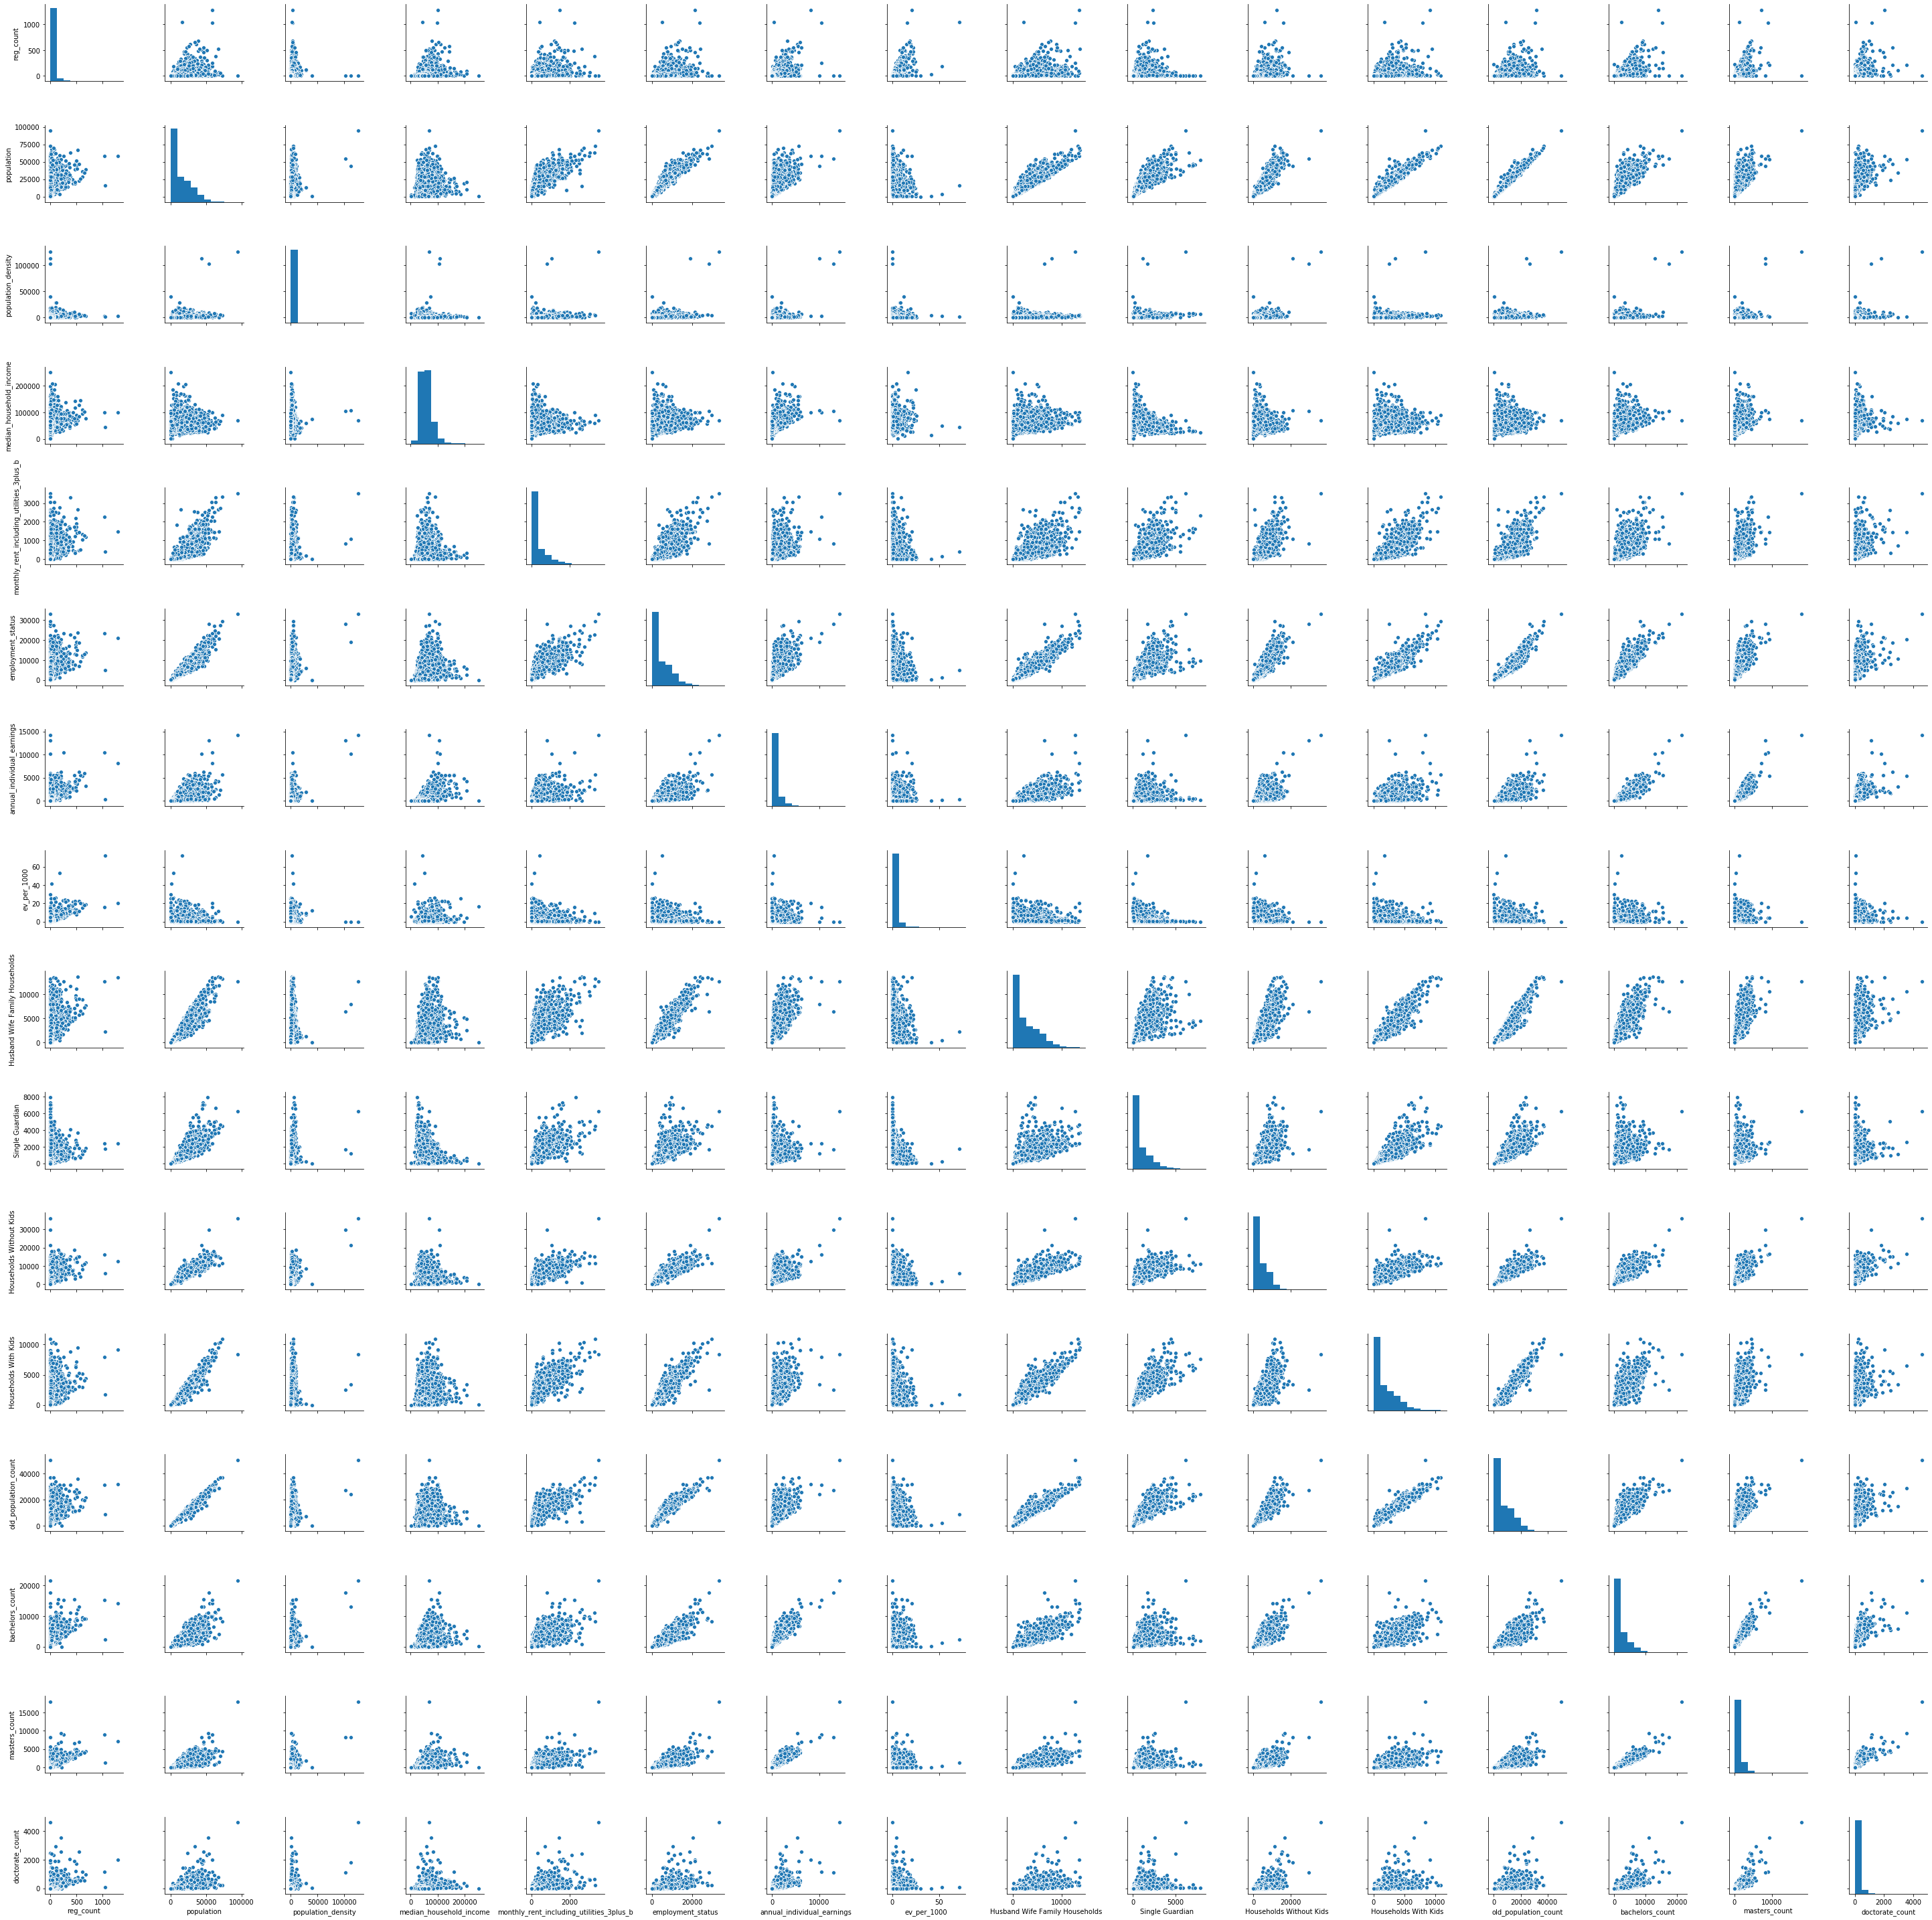

In [276]:
sns.pairplot(df1)

In [228]:
df1=df1.drop(columns='zipcode')
df1=df1.drop(columns='households_with_kids')
df1=df1.drop(columns='ZIP Code')
df1=df1.drop(columns='Unnamed: 0')

In [230]:
df1

reg_count  population  population_density  median_household_income  \
0            12      9123.0               211.0                  54327.0   
1             4      2664.0                38.0                  57478.0   
2             8      2744.0                95.0                  43021.0   
3             1       310.0                55.0                  75625.0   
4             2       638.0                20.0                  48929.0   
5             2      1037.0                31.0                  66875.0   
6             2       560.0                54.0                  70583.0   
7             4      1230.0                31.0                  53583.0   
8             2      1110.0                25.0                  60750.0   
9             2       354.0                60.0                  45833.0   
10            2       605.0                25.0                  46875.0   
11            1      1758.0                34.0                  61875.0   
12            5      2429.0                88.0                  62438.0   
13            4      1549.0                32.0                  47950.0   
14            8       332.0                38.0                  70227.0   
15           60      3363.0                82.0                  95170.0   
16            2       567.0                13.0                  63250.0   
17            2       346.0                84.0                  55417.0   
18            8      4415.0                64.0                  44869.0   
19            2      1679.0                65.0                  61645.0   
20            8      1064.0                33.0                  56731.0   
21            1       258.0                16.0                  67679.0   
22           10      3125.0                61.0                  38894.0   
23            1      3125.0                61.0                  38894.0   
24            1       484.0                35.0                  64583.0   
25            2       526.0                20.0                  60000.0   
26            1         NaN                 NaN                      NaN   
27            6      1113.0                43.0                  91563.0   
28            2      1215.0                29.0                  58929.0   
29            1       730.0                20.0                  45216.0   
...         ...         ...                 ...                      ...   
2916          3      1543.0                68.0                  32500.0   
2917          2      4082.0                25.0                  46875.0   
2918          5      1521.0                 4.0                  45150.0   
2919          6     15252.0               321.0                  44563.0   
2920          1      5032.0               149.0                  39281.0   
2921          1      4112.0                 5.0                  46429.0   
2922          1      2177.0                59.0                  49917.0   
2923          1       495.0                27.0                  53167.0   
2924          3     13225.0                61.0                  35210.0   
2925          1       641.0                 5.0                  66250.0   
2926          1      2776.0               425.0                  42587.0   
2927          2      1064.0                11.0                  43542.0   
2928          1      1785.0                17.0                  42000.0   
2929          7      8820.0               128.0                  54815.0   
2930          3       529.0                39.0                  97167.0   
2931          1      1032.0                13.0                  56053.0   
2932          1      1137.0                16.0                  41042.0   
2933          1       895.0                24.0                  42938.0   
2934          5      5109.0                18.0                  33589.0   
2935          1       761.0                 8.0                  66818.0   
2936          5      1143.0                 3.0       

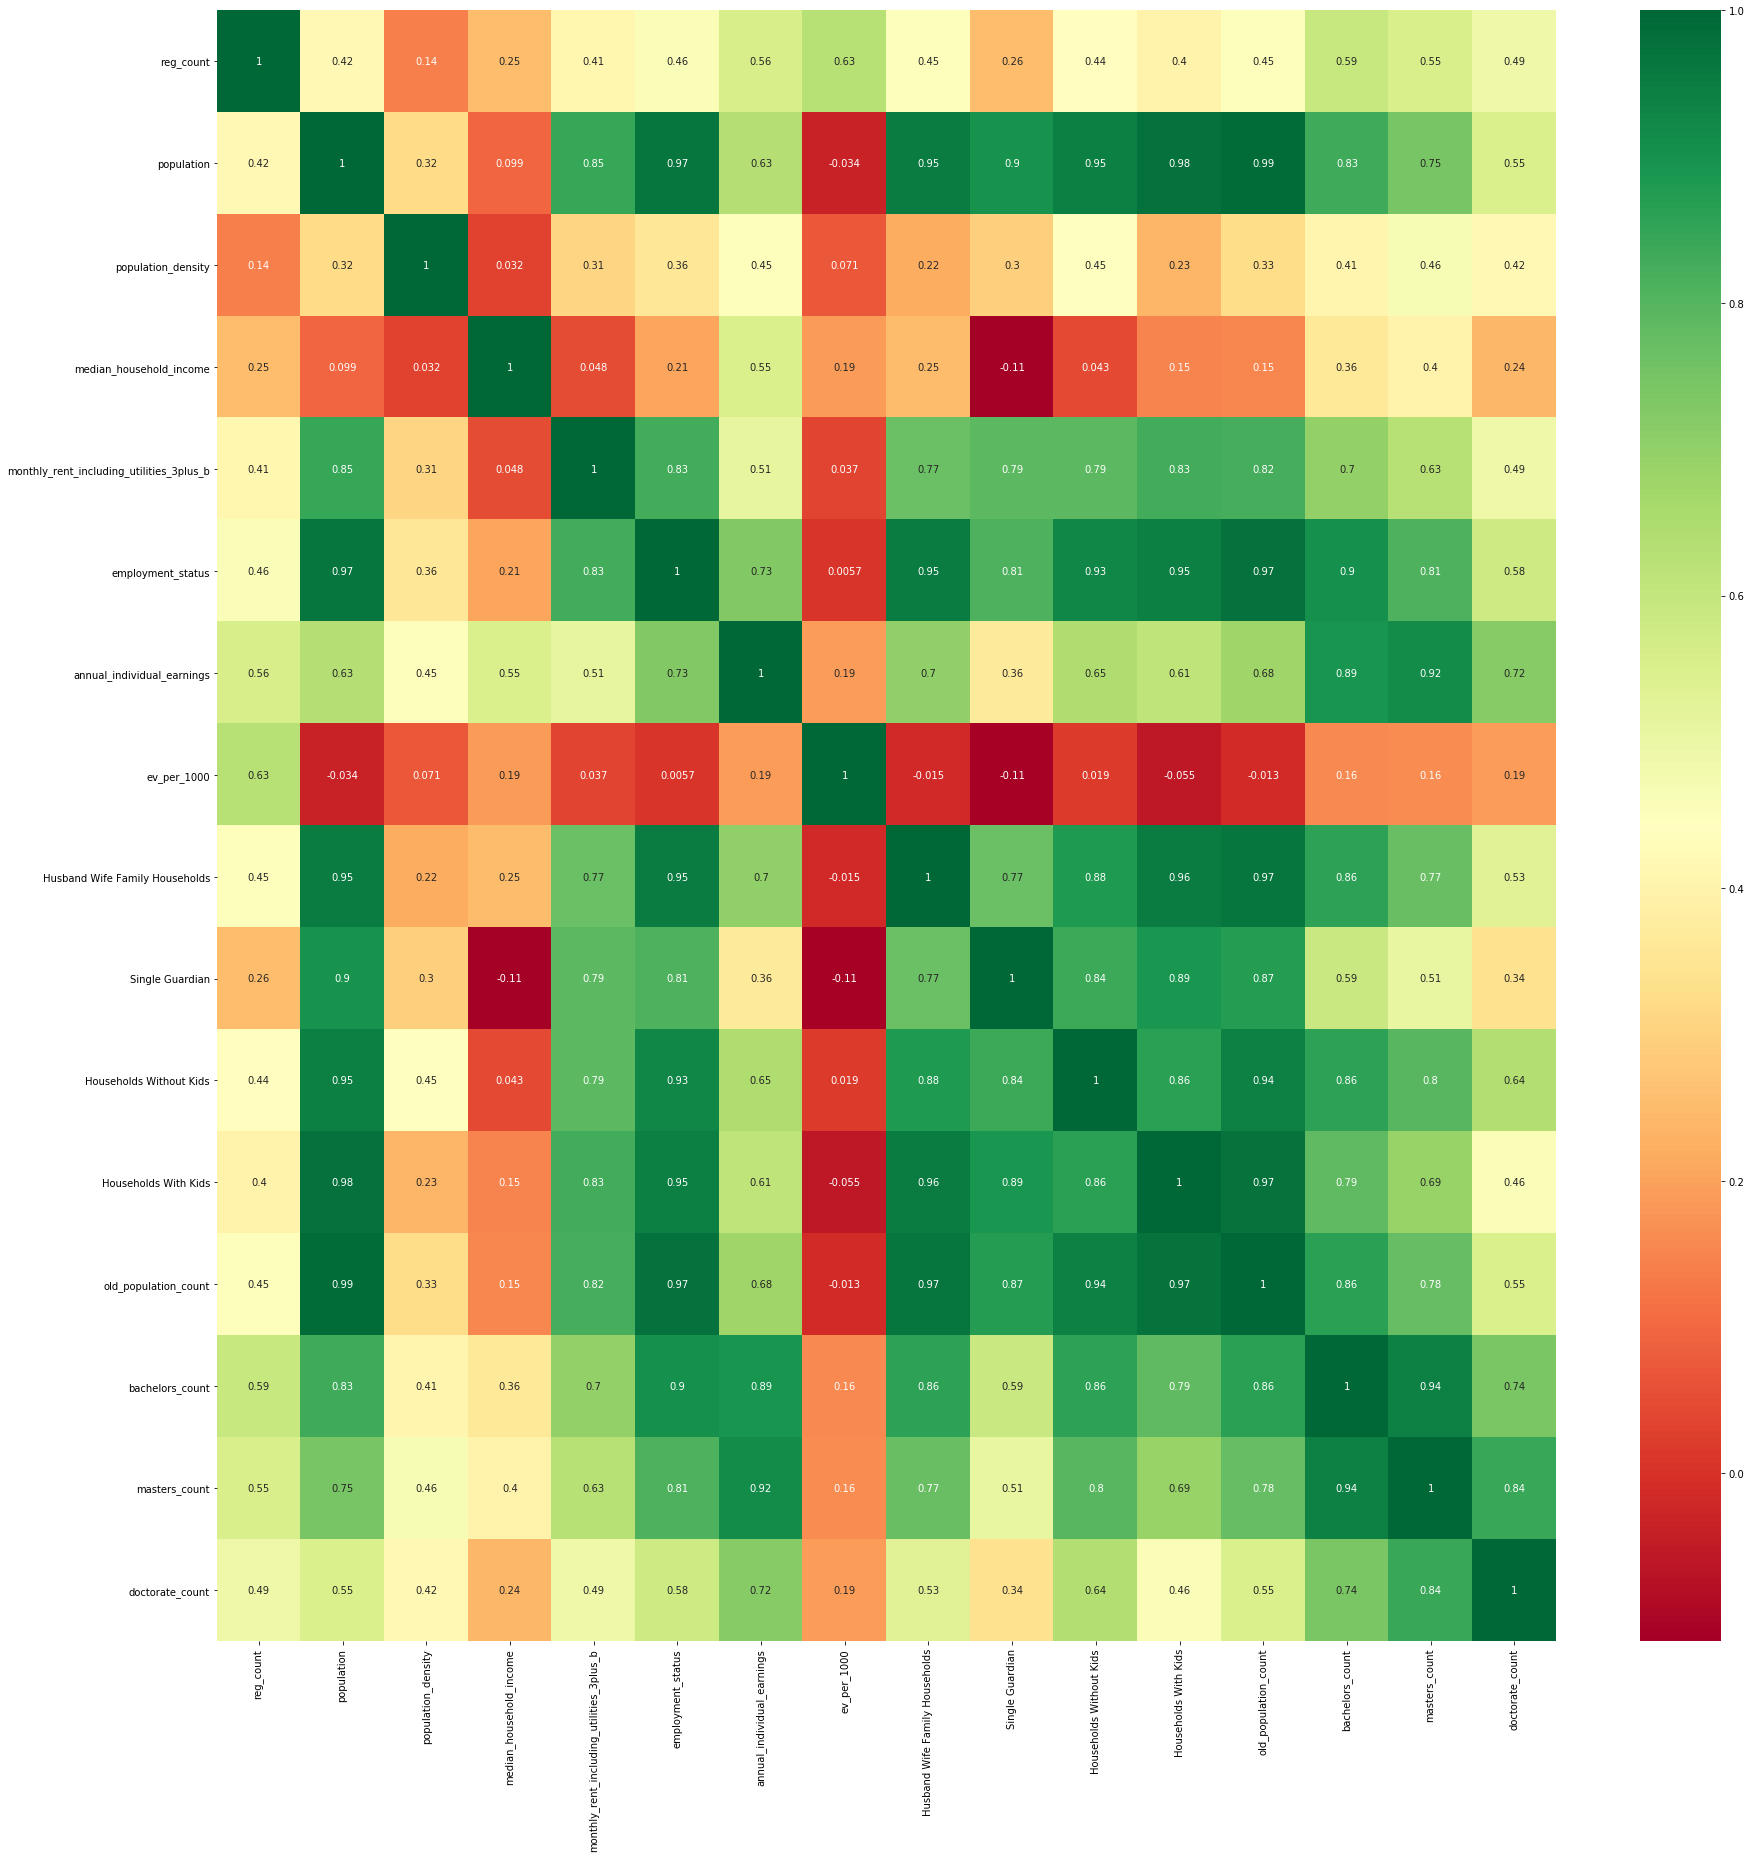

In [231]:
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(df1.corr(),annot=True,cmap="RdYlGn")

In [233]:
msk = np.random.rand(len(df1)) < 0.8

In [234]:
df1.head(2)

reg_count  population  population_density  median_household_income  \
0         12      9123.0               211.0                  54327.0   
1          4      2664.0                38.0                  57478.0   

   monthly_rent_including_utilities_3plus_b  employment_status  \
0                                     276.0             3408.0   
1                                      29.0             1108.0   

   annual_individual_earnings  ev_per_1000  Husband Wife Family Households  \
0                       259.0     1.801802                          1788.0   
1                        43.0     1.843318                           569.0   

   Single Guardian  Households Without Kids  Households With Kids  \
0            599.0                   3022.0                1085.0   
1            181.0                    819.0                 310.0   

   old_population_count  bachelors_count  masters_count  doctorate_count  
0                  4951             1420            878              181  
1                  1470              295            227               14

In [ ]:
sc=RobustScaler()
encoded_x=sc.fit_transform(encoded_x)
encoded_test=sc.transform(encoded_test)

In [235]:
train=df1[msk]

In [236]:
train.head()

reg_count  population  population_density  median_household_income  \
1          4      2664.0                38.0                  57478.0   
2          8      2744.0                95.0                  43021.0   
3          1       310.0                55.0                  75625.0   
5          2      1037.0                31.0                  66875.0   
6          2       560.0                54.0                  70583.0   

   monthly_rent_including_utilities_3plus_b  employment_status  \
1                                      29.0             1108.0   
2                                      36.0              815.0   
3                                       0.0              100.0   
5                                      28.0              413.0   
6                                      17.0              216.0   

   annual_individual_earnings  ev_per_1000  Husband Wife Family Households  \
1                        43.0     1.843318                           569.0   
2                        22.0     3.007519                           510.0   
3                         8.0     3.125000                            63.0   
5                        29.0     2.409639                           247.0   
6                        18.0     2.631579                           146.0   

   Single Guardian  Households Without Kids  Households With Kids  \
1            181.0                    819.0                 310.0   
2            195.0                    735.0                 350.0   
3             20.0                    100.0                  37.0   
5             56.0                    301.0                 125.0   
6             17.0                    182.0                  59.0   

   old_population_count  bachelors_count  masters_count  doctorate_count  
1                  1470              295            227               14  
2                  1449              314            165               18  
3                   182               27             11                0  
5                   620              118             95               17  
6                   340               53             95                3

In [237]:
test=df1[~msk]

In [238]:
test.head()

reg_count  population  population_density  median_household_income  \
0          12      9123.0               211.0                  54327.0   
4           2       638.0                20.0                  48929.0   
13          4      1549.0                32.0                  47950.0   
15         60      3363.0                82.0                  95170.0   
19          2      1679.0                65.0                  61645.0   

    monthly_rent_including_utilities_3plus_b  employment_status  \
0                                      276.0             3408.0   
4                                       26.0              165.0   
13                                      19.0              514.0   
15                                     134.0             1180.0   
19                                      14.0              494.0   

    annual_individual_earnings  ev_per_1000  Husband Wife Family Households  \
0                        259.0     1.801802                          1788.0   
4                         18.0     3.921569                           159.0   
13                        51.0     4.494382                           333.0   
15                       381.0    17.964072                           807.0   
19                         0.0     1.709402                           273.0   

    Single Guardian  Households Without Kids  Households With Kids  \
0             599.0                   3022.0                1085.0   
4              26.0                    236.0                  60.0   
13             97.0                    506.0                 181.0   
15            121.0                    923.0                 441.0   
19             57.0                    371.0                 129.0   

    old_population_count  bachelors_count  masters_count  doctorate_count  
0                   4951             1420            878              181  
4                    411               51             26                2  
13                   878              252            101               27  
15                  1897              776            502              273  
19                   695              126             88               45

In [191]:
len(test)

573

In [192]:
len(train)

2373

In [277]:
# applying log on target variable
import numpy as np
train_y=np.log1p(train_y)
test_y=np.log1p(test_y)

# train and test is split into train and test

In [239]:
train_y=train['reg_count']

In [240]:
train_x=train.drop(columns=['reg_count'])

In [241]:
test_x=test.drop(columns=['reg_count'])

In [242]:
test_y=test['reg_count']

In [246]:
#train and test is split into fillna
train_x=train_x.fillna(0)
test_x=test_x.fillna(0)
train_y=train_y.fillna(0)
test_y=test_y.fillna(0)

# Normalising the data 

In [244]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [247]:
sc=RobustScaler()
encoded_x=sc.fit_transform(train_x)
encoded_test=sc.transform(test_x)

In [ ]:
#Lasso model

In [162]:
from sklearn.linear_model import Lasso, LassoCV

In [260]:
model=Lasso(alpha =0.0005, random_state=42)
model.fit(train_x,train_y)

/Users/akhila/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)

In [278]:
# predictions from lasso model
predictions = model.predict(test_x)

In [254]:
predictions

array([ 1.13651797e+01,  2.04631725e+01,  2.91586484e+01,  1.86524897e+02,
       -1.30341336e+01, -7.13117343e+00,  1.18179693e+02, -8.90049964e+00,
        7.34999633e+01,  1.61361701e+01,  3.94616437e+01,  2.60860907e+00,
        1.19412141e+01,  3.85540234e+01,  2.55673459e+01,  1.00645518e+02,
       -9.20654168e+00,  1.98085759e+01, -6.86108868e+00, -4.30583840e+00,
       -3.60545970e+00,  5.22363065e+01,  1.20288259e+02, -9.31993403e+00,
        2.34531496e+01,  2.82898253e+01, -6.83972764e+00,  6.75122283e+01,
        2.30865457e+01,  2.12992604e-01,  2.68753022e+01,  1.32707523e+01,
        1.23475048e+01,  6.71594634e+00, -1.07702048e+01,  2.94468877e+01,
       -1.22896190e+01,  8.67976355e+00,  7.40608751e+01,  6.12429613e+01,
        4.36367106e+01,  8.56405339e+00,  4.24086774e+01,  5.71833141e+00,
        1.08227196e+02,  1.09518862e+02,  6.81326243e+01,  7.22141737e+01,
        1.19293110e+02,  4.54206983e+01,  8.78202609e+01,  3.41194071e+01,
        1.00962646e+00,  

In [279]:
# calculating RMSE 
from sklearn.metrics import mean_squared_error


test_set_rmse = (np.sqrt(mean_squared_error(test_y, predictions)))
test_set_rmse

1.5045341759856459

(array([2.77e+03, 1.19e+02, 3.30e+01, 1.20e+01, 7.00e+00, 2.00e+00,
        0.00e+00, 0.00e+00, 2.00e+00, 1.00e+00]),
 array([1.0000e+00, 1.2910e+02, 2.5720e+02, 3.8530e+02, 5.1340e+02,
        6.4150e+02, 7.6960e+02, 8.9770e+02, 1.0258e+03, 1.1539e+03,
        1.2820e+03]),
 <a list of 10 Patch objects>)

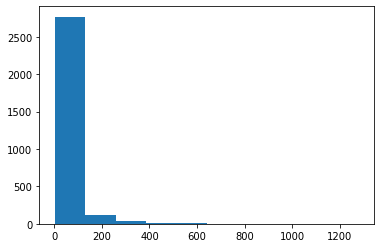

In [257]:
plt.hist(df1['reg_count'])